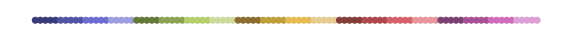

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from sklearn.linear_model import LinearRegression
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')  # Needed because matplotlib uses idiotic color management.

import sklearn.metrics as skmet
import scipy.stats

from matplotlib import cm

colormap = cm.get_cmap('tab20b')

x = np.linspace(0,1,100)
plt.figure(figsize=(10,.5))
plt.scatter(x, np.zeros(x.shape), c=colormap(x)); plt.axis('off');

In [3]:
birth = pd.read_csv("../birth_randoms/metrics.csv").drop(["lr_acc", "auroc","precision"], axis=1)
ring = pd.read_csv("../ring_randoms/metrics.csv").drop(["lr_acc", "auroc","precision"], axis=1)
adult = pd.read_csv("../adult_randoms/metrics.csv").drop(["lr_acc", "auroc","precision"], axis=1)
heart = pd.read_csv("../heart_randoms/metrics.csv").drop(["lr_acc", "auroc","precision"], axis=1)

birth_accs = pd.read_csv("../birth_randoms/accuracy_results.csv")
ring_accs = pd.read_csv("../ring_randoms/accuracy_results.csv")
adult_accs = pd.read_csv("../adult_randoms/accuracy_results.csv")
heart_accs = pd.read_csv("../heart_randoms/accuracy_results.csv")

metrics = pd.concat([birth, ring, adult, heart], keys=["birth", "ring", "adult", "heart"], 
                    names=["dataset"], sort=False).reset_index().drop("level_1", axis=1)
accs = pd.concat([birth_accs, ring_accs, adult_accs, heart_accs], keys=["birth", "ring", "adult", "heart"], 
                 names=["dataset"], sort=False)
accs = accs.drop(["knn_acc", "knn_auroc", "rf_acc", "rf_auroc", "lr_pca_acc", "lr_pca_auroc"], 
                 axis=1).reset_index().drop("level_1", axis=1)
accs

,dataset,algo,no,knn_pca_auroc,knn_pca_acc,rf_pca_auroc,rf_pca_acc,lr_auroc,lr_acc
0,birth,datafly,1,0.464272,0.406780,0.568481,0.437288,0.583774,0.430508
1,birth,datafly_shuffled,1,0.589675,0.440678,0.613460,0.437288,0.619309,0.477966
2,birth,mondrian,1,0.621924,0.450847,0.643375,0.474576,0.627022,0.461017
3,birth,datafly,2,0.441660,0.335593,0.596937,0.437288,0.603186,0.433898
4,birth,datafly_shuffled,2,0.464272,0.406780,0.578368,0.437288,0.583774,0.430508
...,...,...,...,...,...,...,...,...,...
2395,heart,datafly_shuffled,199,0.579031,0.856557,0.668391,0.856557,0.675628,0.855191
2396,heart,mondrian,199,0.613002,0.844262,0.676950,0.856557,0.508012,0.730874
2397,heart,datafly,200,0.648956,0.856557,0.653968,0.856557,0.653285,0.857923
2398,heart,datafly_shuffled,200,0.648956,0.856557,0.654409,0.856557,0.653285,0.857923


In [4]:
plot_info = [(birth, birth_accs, colormap(0), ".", "BIRTH"),
            (ring, ring_accs, colormap(0.61), ".", "RING"),
            (adult, adult_accs, colormap(0.41), ".", "ADULT"),
            (heart, heart_accs, colormap(0.21), ".", "HEART")]

algo_colors={
    "mondrian":colormap(0.1),
    "datafly":colormap(0.3),
    "datafly_shuffled":colormap(0.9)
}

algo_patterns={
    "mondrian":".",
    "datafly":"\\",
    "datafly_shuffled":"/"
}


#= [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

In [27]:
def nicehist(metric, info, with_title=False, with_y_label=False, with_legend=False, with_x_tick=False):
    metric_df, accuracy_df, color, mark, label = info
    for algo in set(metric_df["algo"]):
        plt.hist(metric_df[metric_df["algo"]==algo][metric], alpha=0.7, 
                 color=algo_colors[algo], label=algo, hatch=algo_patterns[algo])
        #plt.legend()
        plt.tick_params(axis='x',which='both',bottom=True)
        plt.xlabel(metric, fontsize=20, fontname='Arial')
    
    if with_y_label:
        plt.ylabel("count", fontsize=20, fontname='Arial')
    else:
        plt.tick_params(axis='y', left=False, labelleft=False)
    if with_title:
        plt.title(label, fontsize=20, fontname='Arial')


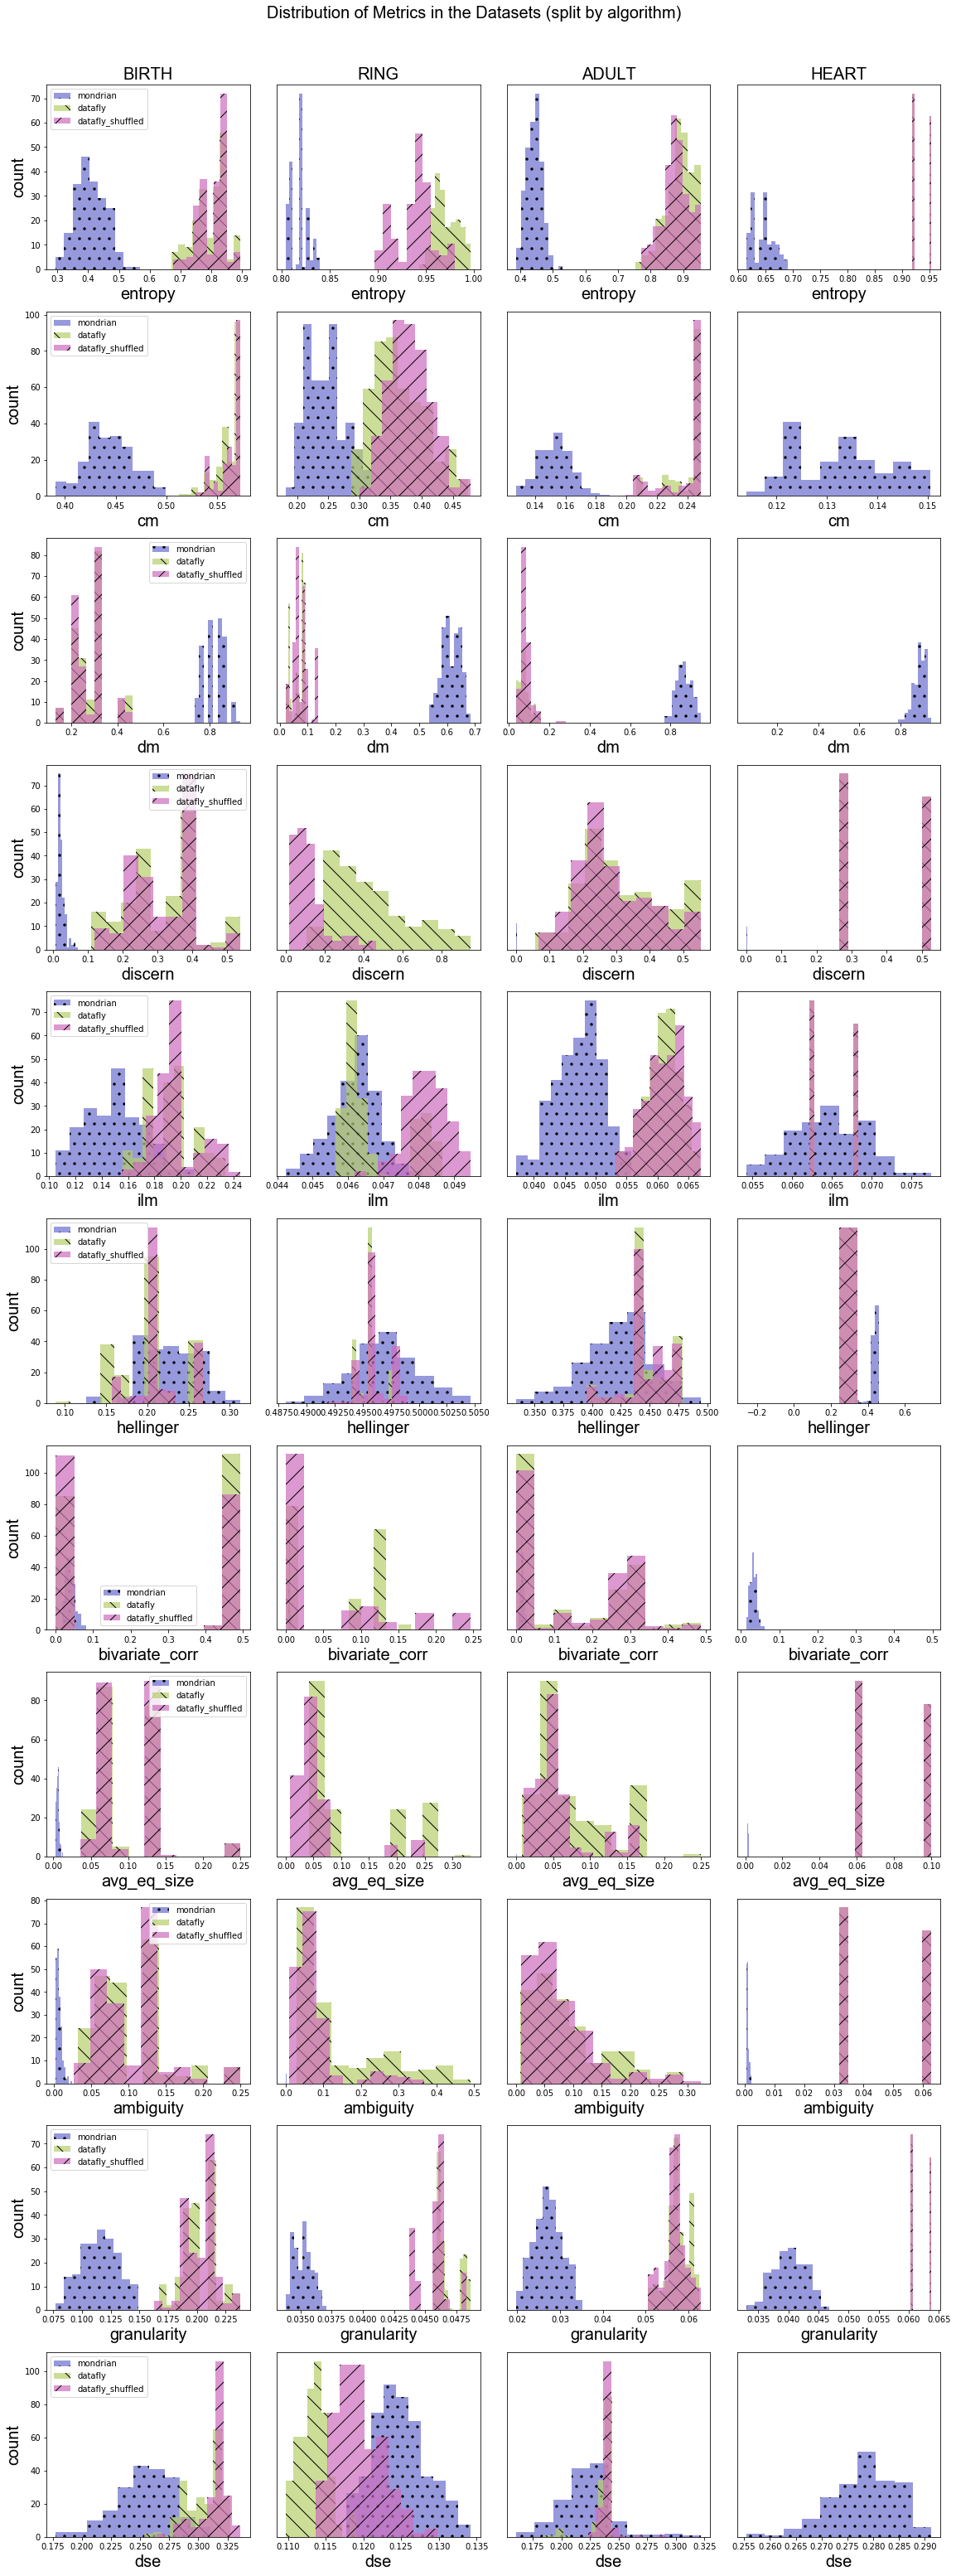

In [28]:
cellsize = 4
n_metrics = len(metrics.columns) -3

plt.figure(figsize=(4*cellsize, n_metrics*cellsize))
plt.suptitle("Distribution of Metrics in the Datasets (split by algorithm)", fontsize=20, fontname='Arial')

for i, metric in enumerate(metrics.columns[3:]):
    for j,x in enumerate(plot_info):
        plt.subplot(n_metrics, 4, i*4+j+1)
        nicehist(metric, x, with_title=(i==0), with_y_label=(j==0), with_x_tick=True)
        if j == 0:
            plt.legend()
            
            
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig(f"histograms/pat_full_scatter.png")

<Figure size 1152x3168 with 0 Axes>

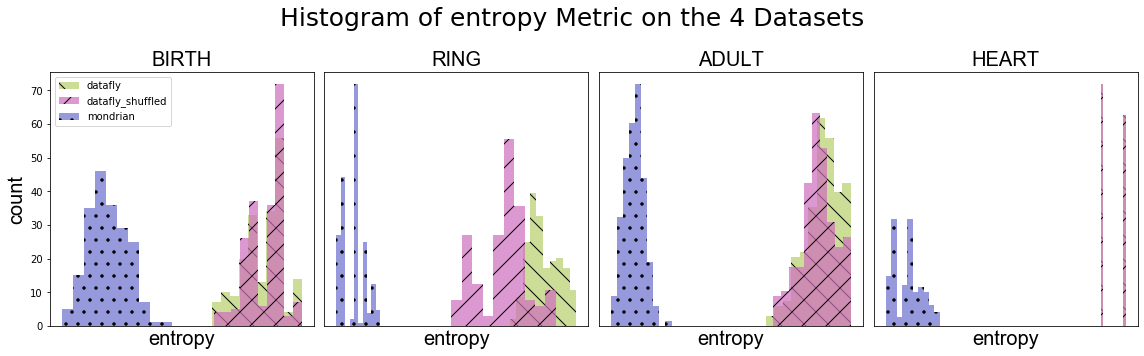

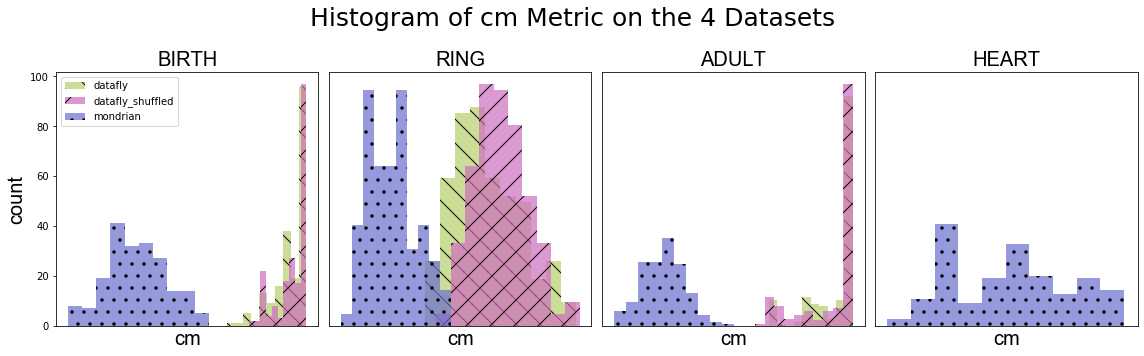

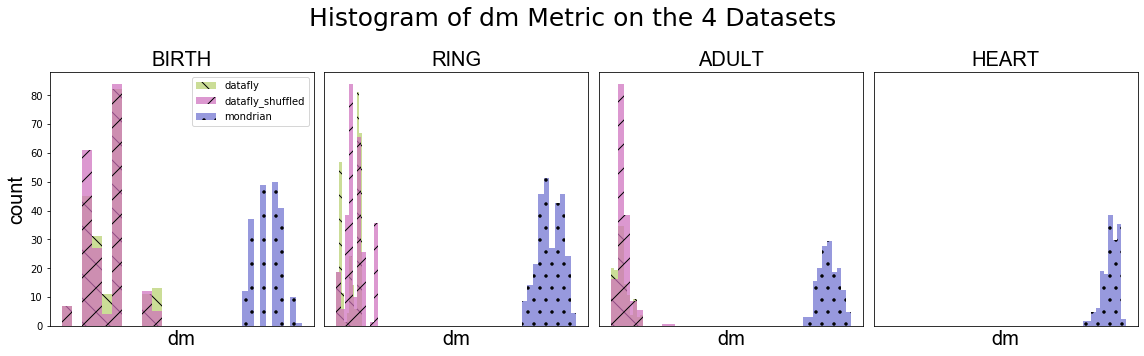

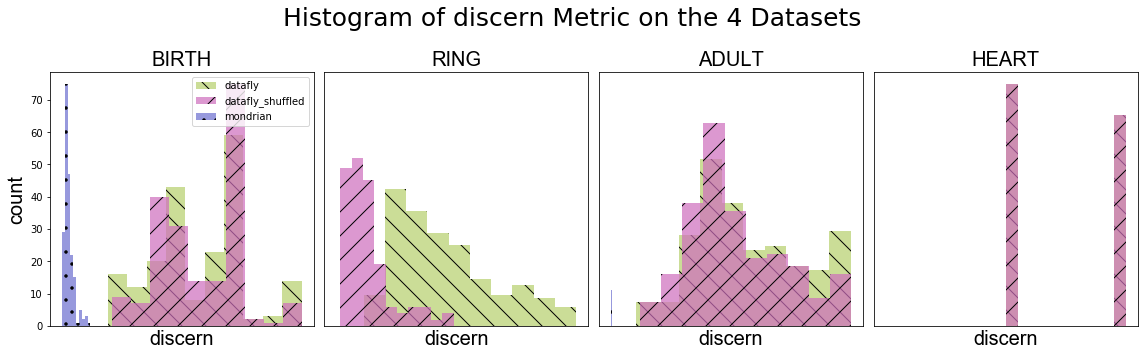

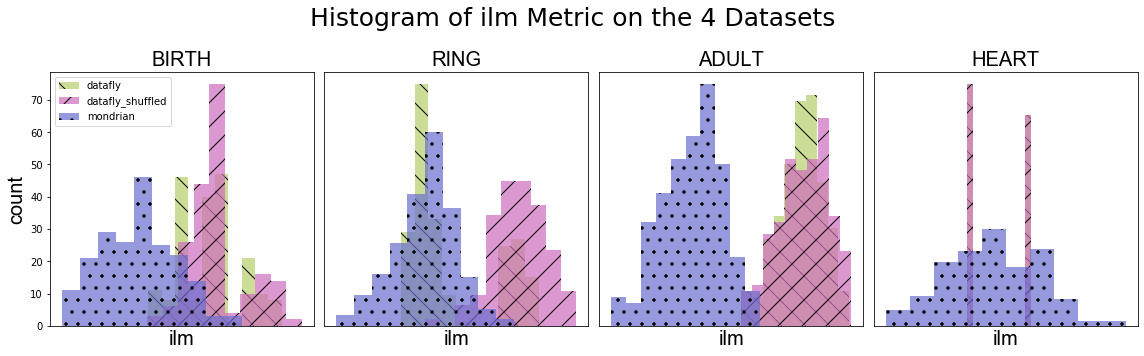

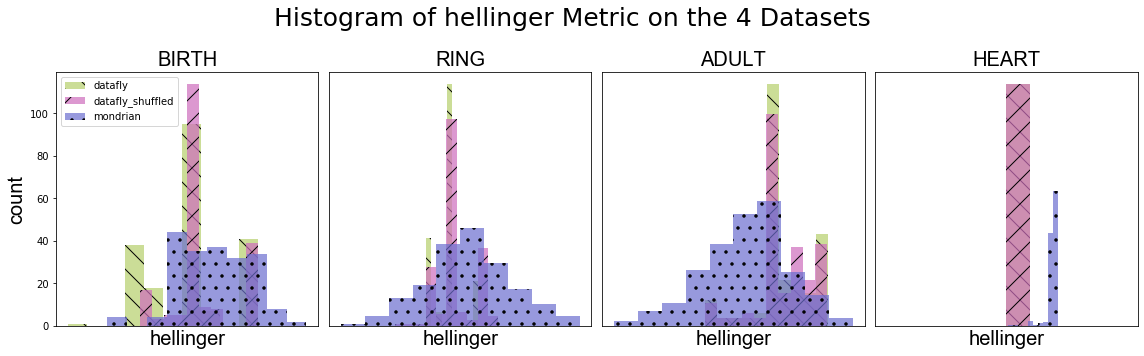

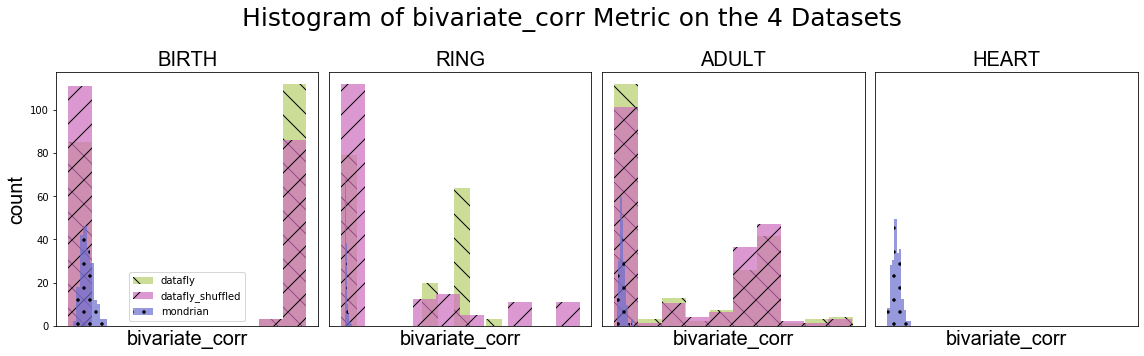

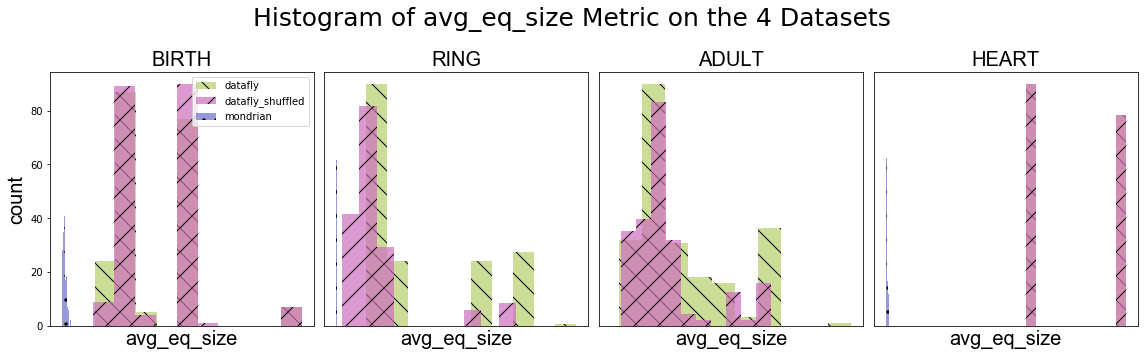

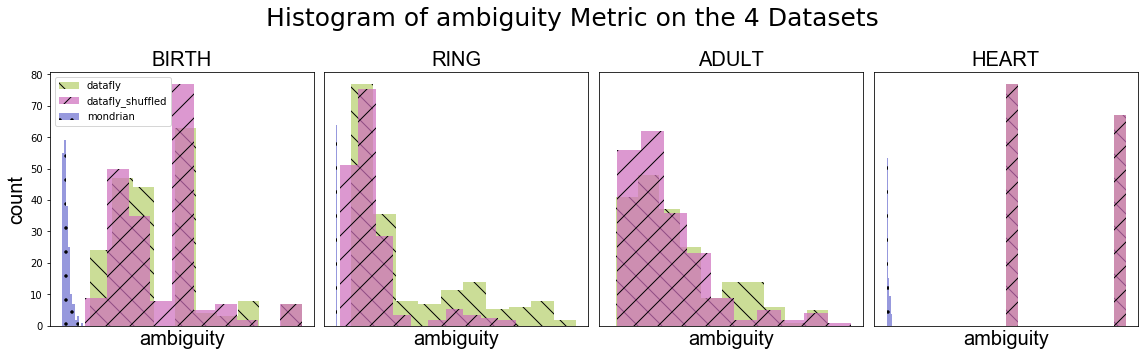

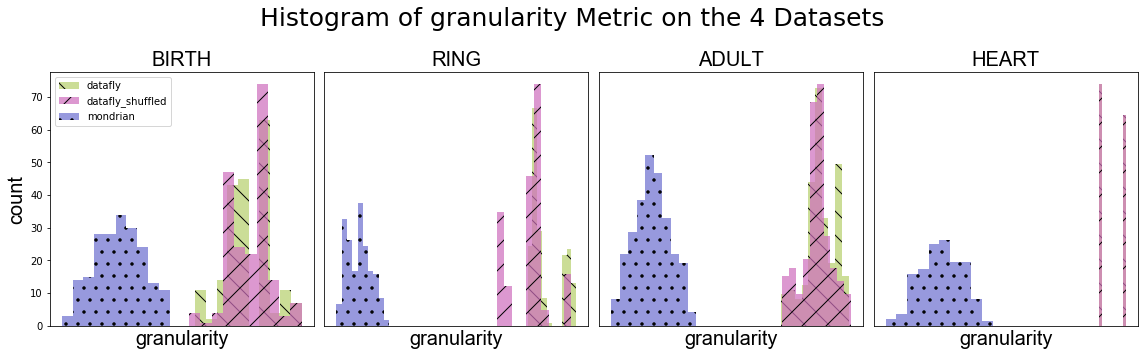

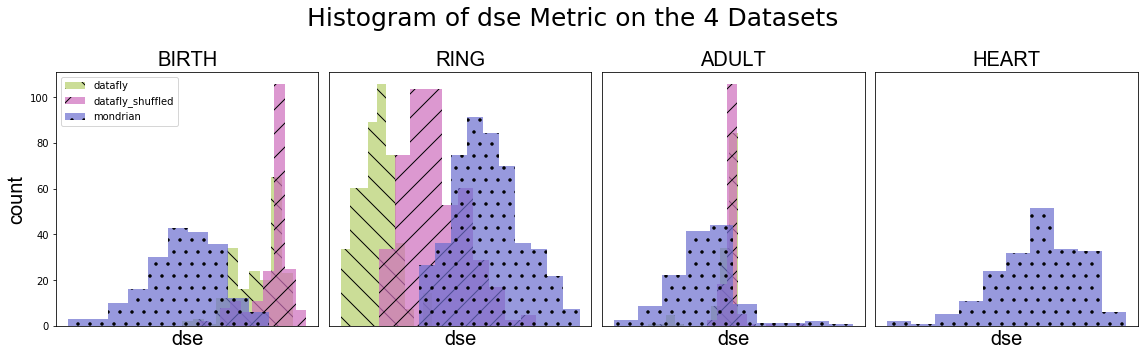

In [86]:
cellsize = 4
n_metrics = len(metrics.columns) -3

plt.figure(figsize=(4*cellsize, n_metrics*cellsize))
plt.suptitle("Distribution of Metrics in the Datasets (split by algorithm)", fontsize=20, fontname='Arial')

for i, metric in enumerate(metrics.columns[3:]):
    plt.figure(figsize=(4*cellsize, cellsize+1))
    plt.suptitle(f"Histogram of {metric} Metric on the 4 Datasets", fontsize=25)
    
    for j,x in enumerate(plot_info):
        plt.subplot(1, 4, j+1)
        nicehist(metric, x, with_title=True, with_y_label=(j==0))
        if j == 0:
            plt.legend()
            
    plt.tight_layout()
    plt.subplots_adjust(top=0.8)
    plt.savefig(f"histograms/{metric}_hist.png")
            

